# What

> Análise de dois datasets:
> Enem por Escolas: dados sobre o desempenho de cada escola no ENEM 
> censo escolar 2015: dados sobre a infraestrutura das escolas

>O objetivo será analisar a relação entre essas duas bases, entendendo como fatores socioeconomicos afetam o desempenho no ENEM, explorando também possíveis relações regionais

# Why

> Dado que o enem é o ponto de entrada no ensino superior, é extremamente importante entender a influência de fatores socioeconomicos e estruturais e como isso pode afetar o acesso a educação

# How

> será realizada uma analise explorátoria nos dados separadamente, depois uma analise conjunta comparando as duas tabelas

# Imports

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.patheffects as patheffects
import matplotlib.colors as mcolors

# Analise Inicial e Limpeza

> carregando as tabelas

In [60]:
df_enem_escola = pd.read_csv('microdados_enem_por_escola/DADOS/MICRODADOS_ENEM_ESCOLA.csv', encoding='ISO-8859-1', sep=';')
df_enem_escola.head()
df_censo = pd.read_csv('microdados_ed_basica_2015/dados/microdados_ed_basica_2015.csv', encoding='ISO-8859-1', sep=';')

/var/folders/xy/xqxsj6796gl11wpqz6hp11sr0000gn/T/ipykernel_21349/1856550647.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_enem_escola = pd.read_csv('microdados_enem_por_escola/DADOS/MICRODADOS_ENEM_ESCOLA.csv', encoding='ISO-8859-1', sep=';')
/var/folders/xy/xqxsj6796gl11wpqz6hp11sr0000gn/T/ipykernel_21349/1856550647.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df_censo = pd.read_csv('microdados_ed_basica_2015/dados/microdados_ed_basica_2015.csv', encoding='ISO-8859-1', sep=';')


## Enem Por Escolas - Análise Inicial

> Sao 27 colunas:
> - 24 numéricas (8 int e 14 float)
> - 8 categóricas

> Inicialmente temos 172,305 linhas contendo informações de 2005 a 2015  
> - Primeiras 10 colunas são informações relacionadas a escola, como nome, uf, municipio e etc  
> - Colunas 11 a 20 são informações sobre participação no enem, media de nota por area do conhecimento, taxa de participação  
> - Coluna 21 é o indice socioeconomico  
> - Coluna 22 é referente ao nivel de formação do corpo docente  
> - Colunas 23 a 26 são informações referentes ao desempenho, permanencia, aprovação, reprovação, abandono  
> - Coluna 27 é o porte da escola

In [61]:
df_enem_escola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172305 entries, 0 to 172304
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NU_ANO                     172305 non-null  int64  
 1   CO_UF_ESCOLA               172305 non-null  int64  
 2   SG_UF_ESCOLA               172305 non-null  object 
 3   CO_MUNICIPIO_ESCOLA        172305 non-null  int64  
 4   NO_MUNICIPIO_ESCOLA        172305 non-null  object 
 5   CO_ESCOLA_EDUCACENSO       172305 non-null  int64  
 6   NO_ESCOLA_EDUCACENSO       172305 non-null  object 
 7   TP_DEPENDENCIA_ADM_ESCOLA  172305 non-null  int64  
 8   TP_LOCALIZACAO_ESCOLA      172305 non-null  int64  
 9   NU_MATRICULAS              172305 non-null  int64  
 10  NU_PARTICIPANTES_NEC_ESP   45355 non-null   float64
 11  NU_PARTICIPANTES           172305 non-null  int64  
 12  NU_TAXA_PARTICIPACAO       104687 non-null  float64
 13  NU_MEDIA_CN                10

In [62]:
df_enem_escola.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
0,2007,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,144,NaN,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.03,NaN,NaN,NaN,91.9,8.1,0.0,Maior que 90 alunos
1,2006,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,184,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.82,NaN,NaN,NaN,NaN,NaN,NaN,Maior que 90 alunos
2,2005,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,220,NaN,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.83,NaN,NaN,NaN,86.5,12.4,1.1,Maior que 90 alunos
3,2008,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,186,NaN,171,NaN,NaN,NaN,NaN,NaN,72.16,60.02,NaN,NaN,NaN,NaN,90.3,9.7,0.0,Maior que 90 alunos
4,2007,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,19,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.84,NaN,NaN,NaN,74.2,21.0,4.8,De 1 a 30 alunos


> Como iremos analisar o censo de 2015 o primeiro processamento será filtrar a tabela para pegar apenas os dados de 2015  
> Com isso ficamos com um total de 15,598 linhas

In [63]:
df_enem_escola_2015 = df_enem_escola.loc[df_enem_escola['NU_ANO'] == 2015]
df_enem_escola_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15598 entries, 67619 to 172304
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   NU_ANO                     15598 non-null  int64  
 1   CO_UF_ESCOLA               15598 non-null  int64  
 2   SG_UF_ESCOLA               15598 non-null  object 
 3   CO_MUNICIPIO_ESCOLA        15598 non-null  int64  
 4   NO_MUNICIPIO_ESCOLA        15598 non-null  object 
 5   CO_ESCOLA_EDUCACENSO       15598 non-null  int64  
 6   NO_ESCOLA_EDUCACENSO       15598 non-null  object 
 7   TP_DEPENDENCIA_ADM_ESCOLA  15598 non-null  int64  
 8   TP_LOCALIZACAO_ESCOLA      15598 non-null  int64  
 9   NU_MATRICULAS              15598 non-null  int64  
 10  NU_PARTICIPANTES_NEC_ESP   15598 non-null  float64
 11  NU_PARTICIPANTES           15598 non-null  int64  
 12  NU_TAXA_PARTICIPACAO       15598 non-null  float64
 13  NU_MEDIA_CN                15598 non-null  flo

In [64]:
df_enem_escola_2015.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
67619,2015,11,RO,1100205,Porto Velho,11000058,CENTRO DE ENSINO CLASSE A,4,1,137,0.0,130,94.89,591.64,652.34,604.53,627.66,732.00,NaN,NaN,Grupo 6,67.5,78.46,96.1,3.9,0.0,Maior que 90 alunos
67628,2015,11,RO,1100205,Porto Velho,11000171,CENTRO EDUCACIONAL MOJUCA,4,1,20,1.0,17,85.00,458.46,533.51,472.62,459.72,507.82,NaN,NaN,Grupo 4,58.3,70.59,94.6,5.4,0.0,De 1 a 30 alunos
67640,2015,11,RO,1100205,Porto Velho,11000198,CENTRO EDUCACIONAL OBJETIVO,4,1,39,0.0,37,94.87,529.05,583.87,547.11,507.22,652.43,NaN,NaN,Grupo 5,67.7,40.54,90.1,9.9,0.0,De 31 a 60 alunos
67642,2015,11,RO,1100205,Porto Velho,11000244,COLEGIO DOM BOSCO,4,1,55,1.0,49,89.09,508.74,586.45,531.35,529.87,591.84,NaN,NaN,Grupo 5,56.0,81.63,88.7,10.5,0.8,De 31 a 60 alunos
67648,2015,11,RO,1100205,Porto Velho,11000252,CENTRO EDUCACIONAL OBJETIVO - UNIDADE JARDIM AMERICA,4,1,26,0.0,23,88.46,523.38,591.66,563.45,528.93,583.48,NaN,NaN,Grupo 5,72.7,52.17,84.5,13.1,2.4,De 1 a 30 alunos


> Primero passo é verificar se há dados faltantes  
> A média da parte objetiva e total vieram vazias em todas as linhas — mas esses valores podem ser calculados  
> A coluna PC_FORMACAO_DOCENTE tem 19 dados faltantes  
> As colunas NU_TAXA_APROVACAO, NU_TAXA_REPROVACAO, NU_TAXA_ABANDONO tem 82 dados faltantes 

In [65]:
df_enem_escola_2015.isnull().sum()

NU_ANO                           0
CO_UF_ESCOLA                     0
SG_UF_ESCOLA                     0
CO_MUNICIPIO_ESCOLA              0
NO_MUNICIPIO_ESCOLA              0
CO_ESCOLA_EDUCACENSO             0
NO_ESCOLA_EDUCACENSO             0
TP_DEPENDENCIA_ADM_ESCOLA        0
TP_LOCALIZACAO_ESCOLA            0
NU_MATRICULAS                    0
NU_PARTICIPANTES_NEC_ESP         0
NU_PARTICIPANTES                 0
NU_TAXA_PARTICIPACAO             0
NU_MEDIA_CN                      0
NU_MEDIA_CH                      0
NU_MEDIA_LP                      0
NU_MEDIA_MT                      0
NU_MEDIA_RED                     0
NU_MEDIA_OBJ                 15598
NU_MEDIA_TOT                 15598
INSE                             1
PC_FORMACAO_DOCENTE             19
NU_TAXA_PERMANENCIA              0
NU_TAXA_APROVACAO               82
NU_TAXA_REPROVACAO              82
NU_TAXA_ABANDONO                82
PORTE_ESCOLA                     0
dtype: int64

> como esse número representa uma porcentagem bem pequena da quantidade total, optamos por excluir as linhas que contem dados faltantes  
> ficamos então com um total de 15,497 linhas

In [66]:
df_enem_escola_2015 = df_enem_escola_2015.dropna(subset=['NU_TAXA_APROVACAO', 'PC_FORMACAO_DOCENTE', 'INSE'])
df_enem_escola_2015.shape

(15497, 27)

> completando a coluda de media objetiva e média total

In [67]:
df_enem_escola_2015['NU_MEDIA_OBJ'] = df_enem_escola_2015[
    ['NU_MEDIA_CH', 'NU_MEDIA_CN', 'NU_MEDIA_LP', 'NU_MEDIA_MT']
].mean(axis=1)

df_enem_escola_2015['NU_MEDIA_TOT'] = df_enem_escola_2015[
    ['NU_MEDIA_OBJ', 'NU_MEDIA_RED']
].mean(axis=1)


In [68]:
df_enem_escola_2015.describe()


,NU_ANO,CO_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO
count,15497.0,15497.000000,1.549700e+04,1.549700e+04,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000,15497.000000
mean,2015.0,33.145641,3.331123e+06,3.327631e+07,2.792992,1.036136,85.693554,0.556430,62.671678,76.106306,490.797440,566.680732,515.229822,492.495558,563.582697,516.300888,539.941792,60.422630,76.443371,87.406285,8.803504,3.790211
std,0.0,9.275797,9.290573e+05,9.264129e+06,1.005211,0.186635,84.033039,1.329321,61.989427,15.386659,47.448864,40.178140,41.905099,69.103568,77.925528,48.417537,61.642956,17.192164,50.100925,10.955223,7.917636,5.559721
min,2015.0,11.000000,1.100015e+06,1.100006e+07,1.000000,1.000000,10.000000,0.000000,10.000000,50.000000,388.560000,456.180000,397.090000,372.450000,345.000000,413.157500,385.460000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,27.000000,2.704302e+06,2.704076e+07,2.000000,1.000000,29.000000,0.000000,23.000000,62.160000,456.060000,536.960000,483.990000,442.710000,508.000000,480.502500,494.840000,49.700000,69.230000,80.800000,2.800000,0.000000
50%,2015.0,33.000000,3.304557e+06,3.309027e+07,2.000000,1.000000,58.000000,0.000000,42.000000,76.920000,476.620000,558.830000,509.460000,471.250000,546.620000,503.425000,524.397500,61.900000,80.430000,90.500000,6.700000,0.900000
75%,2015.0,35.000000,3.557105e+06,3.592583e+07,4.000000,1.000000,112.000000,1.000000,80.000000,90.320000,519.580000,594.200000,545.630000,528.140000,609.450000,546.462500,577.825000,73.000000,88.890000,96.200000,12.700000,6.000000
max,2015.0,53.000000,5.300108e+06,5.308200e+07,4.000000,2.000000,842.000000,27.000000,716.000000,100.000000,730.510000,721.470000,681.230000,873.650000,930.000000,751.287500,807.622500,100.000000,5822.000000,100.000000,60.200000,85.700000


## Censo 2015 — Análise Inicial

> São 370 colunas  
> 354 são numéricas (2 float e 352 int)  
> 16 são categóricas  
> 237,878 linhas

In [69]:
df_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237879 entries, 0 to 237878
Columns: 370 entries, NU_ANO_CENSO to QT_TUR_ESP_CE
dtypes: float64(2), int64(352), object(16)
memory usage: 671.5+ MB


> - Colunas 1 a 13 são informações sobre a localização da Escola como UF, Municipio, Regiao e etc  
> - 14 a 273 são informações gerais sobre a Escola e todos os dados sobre infraestrutura  
> - 274 a 370 são informações sobre numero de Matriculas e Docentes, incluindo oferta de matricula, numero de matriculas por etapa do ensino, genero, docentes por etapa e etc

In [70]:
list(df_censo.columns)

['NU_ANO_CENSO',
 'NO_REGIAO',
 'CO_REGIAO',
 'NO_UF',
 'SG_UF',
 'CO_UF',
 'NO_MUNICIPIO',
 'CO_MUNICIPIO',
 'NO_MESORREGIAO',
 'CO_MESORREGIAO',
 'NO_MICRORREGIAO',
 'CO_MICRORREGIAO',
 'CO_DISTRITO',
 'CO_ENTIDADE',
 'NO_ENTIDADE',
 'TP_DEPENDENCIA',
 'TP_CATEGORIA_ESCOLA_PRIVADA',
 'TP_LOCALIZACAO',
 'TP_LOCALIZACAO_DIFERENCIADA',
 'DS_ENDERECO',
 'NU_ENDERECO',
 'DS_COMPLEMENTO',
 'NO_BAIRRO',
 'CO_CEP',
 'NU_DDD',
 'NU_TELEFONE',
 'TP_SITUACAO_FUNCIONAMENTO',
 'CO_ORGAO_REGIONAL',
 'DT_ANO_LETIVO_INICIO',
 'DT_ANO_LETIVO_TERMINO',
 'IN_VINCULO_SECRETARIA_EDUCACAO',
 'IN_VINCULO_SEGURANCA_PUBLICA',
 'IN_VINCULO_SECRETARIA_SAUDE',
 'IN_VINCULO_OUTRO_ORGAO',
 'IN_CONVENIADA_PP',
 'TP_CONVENIO_PODER_PUBLICO',
 'IN_MANT_ESCOLA_PRIVADA_EMP',
 'IN_MANT_ESCOLA_PRIVADA_ONG',
 'IN_MANT_ESCOLA_PRIVADA_OSCIP',
 'IN_MANT_ESCOLA_PRIV_ONG_OSCIP',
 'IN_MANT_ESCOLA_PRIVADA_SIND',
 'IN_MANT_ESCOLA_PRIVADA_SIST_S',
 'IN_MANT_ESCOLA_PRIVADA_S_FINS',
 'NU_CNPJ_ESCOLA_PRIVADA',
 'NU_CNPJ_MANTENEDORA',

In [71]:
df_censo.head()

,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,NO_MICRORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,CO_ENTIDADE,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,DS_ENDERECO,NU_ENDERECO,DS_COMPLEMENTO,NO_BAIRRO,CO_CEP,NU_DDD,NU_TELEFONE,TP_SITUACAO_FUNCIONAMENTO,CO_ORGAO_REGIONAL,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,NU_CNPJ_ESCOLA_PRIVADA,NU_CNPJ_MANTENEDORA,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_OUTROS,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_LIXO_JOGA_OUTRA_AREA,IN_LIXO_OUTROS,IN_LIXO_RECICLA,IN_TRATAMENTO_LIXO_SEPARACAO,IN_TRATAMENTO_LIXO_REUTILIZA,IN_TRATAMENTO_LIXO_RECICLAGEM,IN_TRATAMENTO_LIXO_INEXISTENTE,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_DENTRO_PREDIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BERCARIO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_PNE,IN_LAVANDERIA,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_EXISTENTES,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,IN_EQUIP_NENHUM,IN_EQUIP_DVD,QT_EQUIP_DVD,IN_EQUIP_SOM,QT_EQUIP_SOM,IN_EQUIP_TV,QT_EQUIP_TV,IN_EQUIP_LOUSA_DIGITAL,QT_EQUIP_LOUSA_DIGITAL,IN_EQUIP_MULTIMIDIA,QT_EQUIP_MULTIMIDIA,IN_EQUIP_VIDEOCASSETE,IN_EQUIP_RETROPROJETOR,IN_EQUIP_FAX,IN_EQUIP_FOTO,QT_EQUIP_VIDEOCASSETE,QT_EQUIP_PARABOLICA,QT_EQUIP_COPIADORA,QT_EQUIP_RETROPROJETOR,QT_EQUIP_IMPRESSORA,QT_EQUIP_IMPRESSORA_MULT,QT_EQUIP_FAX,QT_EQUIP_FOTO,QT_COMP_ALUNO,IN_DESKTOP_ALUNO,QT_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,QT_TABLET_ALUNO,QT_COMPUTADOR,QT_COMP_ADMINISTRATIVO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,TP_REDE_LOCAL,IN_BANDA_LARGA,QT_FUNC

> o primeiro filtro será pegar os dados apenas de escolas que estão na tabela de 'enem por escolas'   
> assim, ficamos com 15,497 linhas nessa tabela também

In [72]:
df_censo = df_censo[df_censo['CO_ENTIDADE'].isin(df_enem_escola_2015['CO_ESCOLA_EDUCACENSO'])]
df_censo.shape

(15497, 370)

> proximo passo é verificar valores nulos
> - 984 em NU_ENDERECO
> - 13,452 em DS_COMPLEMENTO
> - 206 em 206
> - 727 em CO_ORGAO_REGIONAL
> - 9,251 em NU_CNPJ_ESCOLA_PRIVADA
> - 9,251 em NU_CNPJ_MANTENEDORA

In [73]:
df_censo.isna().sum()

NU_ANO_CENSO                          0
NO_REGIAO                             0
CO_REGIAO                             0
NO_UF                                 0
SG_UF                                 0
CO_UF                                 0
NO_MUNICIPIO                          0
CO_MUNICIPIO                          0
NO_MESORREGIAO                        0
CO_MESORREGIAO                        0
NO_MICRORREGIAO                       0
CO_MICRORREGIAO                       0
CO_DISTRITO                           0
CO_ENTIDADE                           0
NO_ENTIDADE                           0
TP_DEPENDENCIA                        0
TP_CATEGORIA_ESCOLA_PRIVADA           0
TP_LOCALIZACAO                        0
TP_LOCALIZACAO_DIFERENCIADA           0
DS_ENDERECO                           0
NU_ENDERECO                         984
DS_COMPLEMENTO                    13452
NO_BAIRRO                           206
CO_CEP                                0
NU_DDD                                0


> avaliamos que nenhuma dessas colunas seria revante para a nossa analise, então optamos por excluir elas já que elas tem uma quantidade grande de dados faltando

In [74]:
columns_to_drop = ['NU_ENDERECO', 'DS_COMPLEMENTO', 'CO_ORGAO_REGIONAL', 'NU_CNPJ_ESCOLA_PRIVADA', 'NU_CNPJ_MANTENEDORA']
df_censo = df_censo.drop(axis=1,columns=columns_to_drop)

fazendo o merge das tabelas para proseguir com a analise exploratória

In [75]:
df_censo = df_censo.rename(columns={'CO_ENTIDADE': 'CO_ESCOLA_EDUCACENSO'})
df = pd.merge(df_enem_escola_2015, df_censo, how='inner', on='CO_ESCOLA_EDUCACENSO')

In [76]:
df.shape

(15497, 391)

In [77]:
df.head()

,NU_ANO,CO_UF_ESCOLA,SG_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,NO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,NO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,CO_MESORREGIAO,NO_MICRORREGIAO,CO_MICRORREGIAO,CO_DISTRITO,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,DS_ENDERECO,NO_BAIRRO,CO_CEP,NU_DDD,NU_TELEFONE,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_OUTROS,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_LIXO_JOGA_OUTRA_AREA,IN_LIXO_OUTROS,IN_LIXO_RECICLA,IN_TRATAMENTO_LIXO_SEPARACAO,IN_TRATAMENTO_LIXO_REUTILIZA,IN_TRATAMENTO_LIXO_RECICLAGEM,IN_TRATAMENTO_LIXO_INEXISTENTE,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_DENTRO_PREDIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BERCARIO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_PNE,IN_LAVANDERIA,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_EXISTENTES,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,IN_EQUIP_NENHUM,IN_EQUIP_DVD,QT_EQUIP_DVD,IN_EQUIP_SOM,QT_EQUIP_SOM,IN_EQUIP_TV,QT_EQUIP_TV,IN_EQUIP_LOUSA_DIGITAL,QT_EQUIP_LOUSA_DIGITAL,IN_EQUIP_MULTIMIDIA,QT_EQUIP_MULTIMIDIA,IN_EQUIP_VIDEOCASSETE,IN_EQUIP_RETROPROJETOR,IN_EQUIP_FAX,IN_EQUIP_FOTO,QT_EQUIP_VIDEOCASSETE,QT_EQUIP_PARABOLICA,QT_EQUIP_COPIADORA,QT_EQUIP_RETROPROJETOR,QT_EQUIP_IMPRESSORA,QT_EQUIP_IMPRESSORA_MULT,QT_EQUIP_FAX,QT_EQUIP_FOTO,QT_COMP_ALUNO,IN_DESKTOP_AL

> tirando colunas redundantes ou inuteis
> - Colunas que vieram da Enem Por Escolas: NU_ANO, CO_UF_ESCOLA, SG_UF_ESCOLA, CO_MUNICIPIO_ESCOLA, NO_MUNICIPIO_ESCOLA, NO_ESCOLA_EDUCACENSO, 
> - Colunas que vieram da censo 2015: NU_ANO_CENSO, CO_REGIAO, CO_UF, CO_MUNICIPIO, CO_MESORREGIAO, CO_MICRORREGIAO, CO_DISTRITO, NU_DDD, CO_CEP, NU_TELEFONE, 

In [80]:
columns_to_drop = [
    'NU_ANO', 'CO_UF_ESCOLA', 'SG_UF_ESCOLA', 'CO_MUNICIPIO_ESCOLA', 'NO_MUNICIPIO_ESCOLA', 'NO_ESCOLA_EDUCACENSO',
    'NU_ANO_CENSO', 'CO_REGIAO', 'CO_UF', 'CO_MUNICIPIO', 'CO_MESORREGIAO', 'CO_MICRORREGIAO', 'CO_DISTRITO',
    'NU_DDD', 'CO_CEP', 'NU_TELEFONE'
]

df = df.drop(columns=columns_to_drop)

In [81]:
df.shape

(15497, 375)

In [94]:
df.head()

,CO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,INSE,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA,NO_REGIAO,NO_UF,SG_UF,NO_MUNICIPIO,NO_MESORREGIAO,NO_MICRORREGIAO,NO_ENTIDADE,TP_DEPENDENCIA,TP_CATEGORIA_ESCOLA_PRIVADA,TP_LOCALIZACAO,TP_LOCALIZACAO_DIFERENCIADA,DS_ENDERECO,NO_BAIRRO,TP_SITUACAO_FUNCIONAMENTO,DT_ANO_LETIVO_INICIO,DT_ANO_LETIVO_TERMINO,IN_VINCULO_SECRETARIA_EDUCACAO,IN_VINCULO_SEGURANCA_PUBLICA,IN_VINCULO_SECRETARIA_SAUDE,IN_VINCULO_OUTRO_ORGAO,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_OSCIP,IN_MANT_ESCOLA_PRIV_ONG_OSCIP,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,TP_REGULAMENTACAO,TP_RESPONSAVEL_REGULAMENTACAO,CO_ESCOLA_SEDE_VINCULADA,CO_IES_OFERTANTE,IN_LOCAL_FUNC_PREDIO_ESCOLAR,TP_OCUPACAO_PREDIO_ESCOLAR,IN_LOCAL_FUNC_SALAS_EMPRESA,IN_LOCAL_FUNC_SOCIOEDUCATIVO,IN_LOCAL_FUNC_UNID_PRISIONAL,IN_LOCAL_FUNC_PRISIONAL_SOCIO,IN_LOCAL_FUNC_TEMPLO_IGREJA,IN_LOCAL_FUNC_CASA_PROFESSOR,IN_LOCAL_FUNC_GALPAO,TP_OCUPACAO_GALPAO,IN_LOCAL_FUNC_SALAS_OUTRA_ESC,IN_LOCAL_FUNC_OUTROS,IN_PREDIO_COMPARTILHADO,IN_AGUA_FILTRADA,IN_AGUA_POTAVEL,IN_AGUA_REDE_PUBLICA,IN_AGUA_POCO_ARTESIANO,IN_AGUA_CACIMBA,IN_AGUA_FONTE_RIO,IN_AGUA_INEXISTENTE,IN_ENERGIA_REDE_PUBLICA,IN_ENERGIA_GERADOR,IN_ENERGIA_GERADOR_FOSSIL,IN_ENERGIA_OUTROS,IN_ENERGIA_RENOVAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_REDE_PUBLICA,IN_ESGOTO_FOSSA_SEPTICA,IN_ESGOTO_FOSSA_COMUM,IN_ESGOTO_FOSSA,IN_ESGOTO_INEXISTENTE,IN_LIXO_SERVICO_COLETA,IN_LIXO_QUEIMA,IN_LIXO_ENTERRA,IN_LIXO_DESTINO_FINAL_PUBLICO,IN_LIXO_DESCARTA_OUTRA_AREA,IN_LIXO_JOGA_OUTRA_AREA,IN_LIXO_OUTROS,IN_LIXO_RECICLA,IN_TRATAMENTO_LIXO_SEPARACAO,IN_TRATAMENTO_LIXO_REUTILIZA,IN_TRATAMENTO_LIXO_RECICLAGEM,IN_TRATAMENTO_LIXO_INEXISTENTE,IN_ALMOXARIFADO,IN_AREA_VERDE,IN_AUDITORIO,IN_BANHEIRO_FORA_PREDIO,IN_BANHEIRO_DENTRO_PREDIO,IN_BANHEIRO,IN_BANHEIRO_EI,IN_BANHEIRO_PNE,IN_BANHEIRO_FUNCIONARIOS,IN_BANHEIRO_CHUVEIRO,IN_BERCARIO,IN_BIBLIOTECA,IN_BIBLIOTECA_SALA_LEITURA,IN_COZINHA,IN_DESPENSA,IN_DORMITORIO_ALUNO,IN_DORMITORIO_PROFESSOR,IN_LABORATORIO_CIENCIAS,IN_LABORATORIO_INFORMATICA,IN_PATIO_COBERTO,IN_PATIO_DESCOBERTO,IN_PARQUE_INFANTIL,IN_PISCINA,IN_QUADRA_ESPORTES,IN_QUADRA_ESPORTES_COBERTA,IN_QUADRA_ESPORTES_DESCOBERTA,IN_REFEITORIO,IN_SALA_ATELIE_ARTES,IN_SALA_MUSICA_CORAL,IN_SALA_ESTUDIO_DANCA,IN_SALA_MULTIUSO,IN_SALA_DIRETORIA,IN_SALA_LEITURA,IN_SALA_PROFESSOR,IN_SALA_REPOUSO_ALUNO,IN_SECRETARIA,IN_SALA_ATENDIMENTO_ESPECIAL,IN_TERREIRAO,IN_VIVEIRO,IN_DEPENDENCIAS_PNE,IN_LAVANDERIA,IN_DEPENDENCIAS_OUTRAS,IN_ACESSIBILIDADE_CORRIMAO,IN_ACESSIBILIDADE_ELEVADOR,IN_ACESSIBILIDADE_PISOS_TATEIS,IN_ACESSIBILIDADE_VAO_LIVRE,IN_ACESSIBILIDADE_RAMPAS,IN_ACESSIBILIDADE_SINAL_SONORO,IN_ACESSIBILIDADE_SINAL_TATIL,IN_ACESSIBILIDADE_SINAL_VISUAL,IN_ACESSIBILIDADE_INEXISTENTE,QT_SALAS_EXISTENTES,QT_SALAS_UTILIZADAS_DENTRO,QT_SALAS_UTILIZADAS_FORA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS,QT_SALAS_UTILIZADAS_ACESSIVEIS,IN_EQUIP_PARABOLICA,IN_COMPUTADOR,IN_EQUIP_COPIADORA,IN_EQUIP_IMPRESSORA,IN_EQUIP_IMPRESSORA_MULT,IN_EQUIP_SCANNER,IN_EQUIP_NENHUM,IN_EQUIP_DVD,QT_EQUIP_DVD,IN_EQUIP_SOM,QT_EQUIP_SOM,IN_EQUIP_TV,QT_EQUIP_TV,IN_EQUIP_LOUSA_DIGITAL,QT_EQUIP_LOUSA_DIGITAL,IN_EQUIP_MULTIMIDIA,QT_EQUIP_MULTIMIDIA,IN_EQUIP_VIDEOCASSETE,IN_EQUIP_RETROPROJETOR,IN_EQUIP_FAX,IN_EQUIP_FOTO,QT_EQUIP_VIDEOCASSETE,QT_EQUIP_PARABOLICA,QT_EQUIP_COPIADORA,QT_EQUIP_RETROPROJETOR,QT_EQUIP_IMPRESSORA,QT_EQUIP_IMPRESSORA_MULT,QT_EQUIP_FAX,QT_EQUIP_FOTO,QT_COMP_ALUNO,IN_DESKTOP_ALUNO,QT_DESKTOP_ALUNO,IN_COMP_PORTATIL_ALUNO,QT_COMP_PORTATIL_ALUNO,IN_TABLET_ALUNO,QT_TABLET_ALUNO,QT_COMPUTADOR,QT_COMP_ADMINISTRATIVO,IN_INTERNET,IN_INTERNET_ALUNOS,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET

# Análise Exploratória

> a partir do boxplot da média total podemos perceber que existem outliers nesses dados, mas precisamos investigar se eles afetam ou não a percepção geral

In [159]:
df['NU_MEDIA_TOT'].describe()

count    15497.000000
mean       539.941792
std         61.642956
min        385.460000
25%        494.840000
50%        524.397500
75%        577.825000
max        807.622500
Name: NU_MEDIA_TOT, dtype: float64

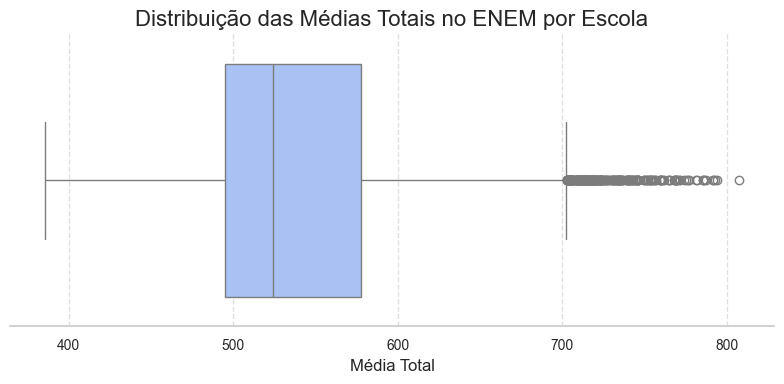

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cor personalizada da paleta coolwarm
cor = sns.color_palette("coolwarm", as_cmap=True)(0.3)

# Criação do boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(
    x=df['NU_MEDIA_TOT'],
    color=cor)

# Títulos e estilo
plt.title('Distribuição das Médias Totais no ENEM por Escola', fontsize=16)
plt.xlabel('Média Total', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks([]) 
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True)

plt.tight_layout()
plt.show()


> checando se a média total é afetada por outliers ou não, a principio achamos que não é afetada, ja que a distribuição segue praticamente a mesma

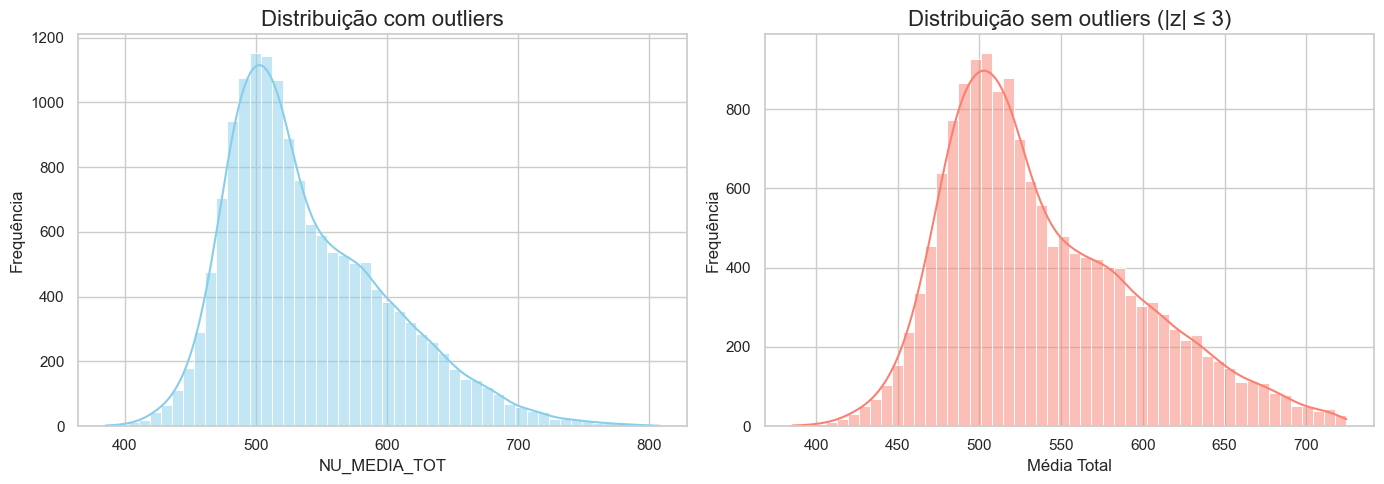

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# --- Define limites para remoção de outliers com base no Z-score ---
scaler = StandardScaler()
df['Z_SCORE'] = scaler.fit_transform(df[['NU_MEDIA_TOT']])

# Remove outliers com |z| > 3 na variável original
df_sem_outliers = df[df['Z_SCORE'].abs() <= 3]

# --- Plot: Histogramas lado a lado (sem normalização) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Com outliers
sns.histplot(df['NU_MEDIA_TOT'], bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribuição com outliers', fontsize=16)
axes[0].set_xlabel('NU_MEDIA_TOT')
axes[0].set_ylabel('Frequência')

# Sem outliers
sns.histplot(df_sem_outliers['NU_MEDIA_TOT'], bins=50, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribuição sem outliers (|z| ≤ 3)', fontsize=16)
axes[1].set_xlabel('Média Total')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


> como a média e o desvio padrão praticamente não mudam e a media segue bem proxima da mediana mesmo com todos os daodos é seguro afirmar que os outliers não estão afetando a percepção geral e não estão distorcendo a distribuição, portanto não vemos necessidade que remover os outliers

In [148]:
# Com outliers
desc_com_outliers = df['NU_MEDIA_TOT'].describe()

# Sem outliers
desc_sem_outliers = df_sem_outliers['NU_MEDIA_TOT'].describe()

# Comparar lado a lado
comparacao = pd.DataFrame({
    'Com outliers': desc_com_outliers,
    'Sem outliers': desc_sem_outliers
})

print(comparacao)


       Com outliers  Sem outliers
count  15497.000000  15392.000000
mean     539.941792    538.503549
std       61.642956     59.312742
min      385.460000    385.460000
25%      494.840000    494.676562
50%      524.397500    523.912500
75%      577.825000    576.409688
max      807.622500    724.426250


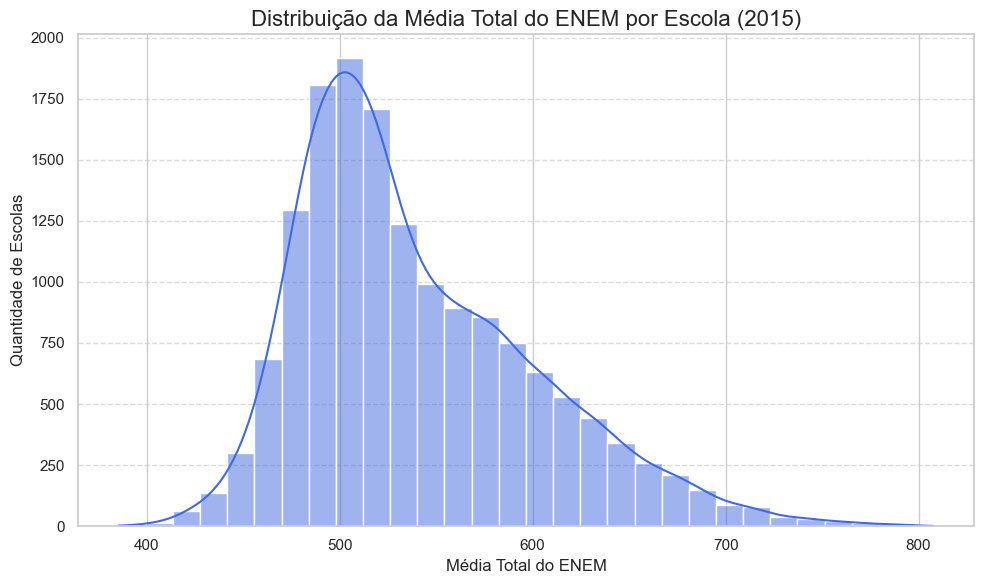

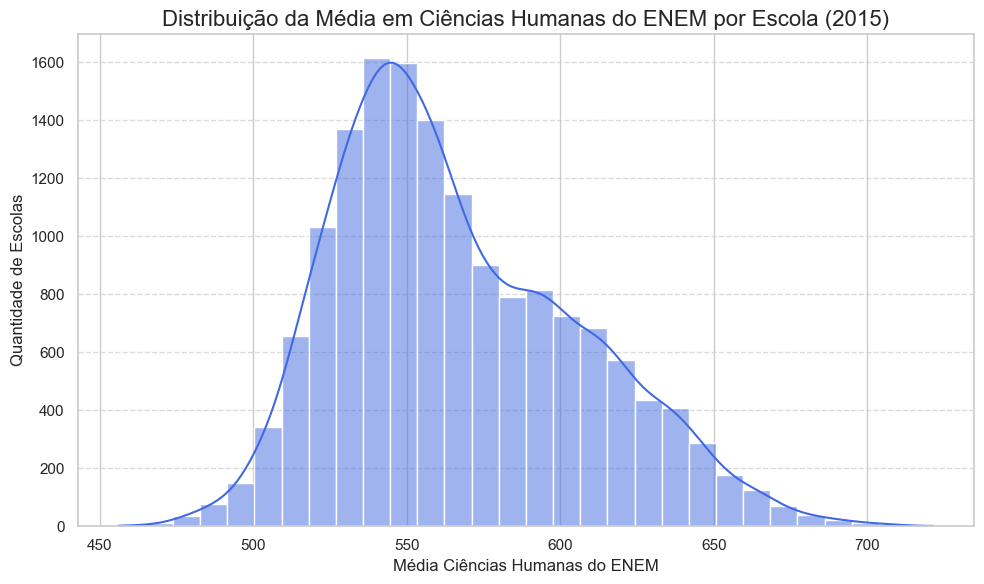

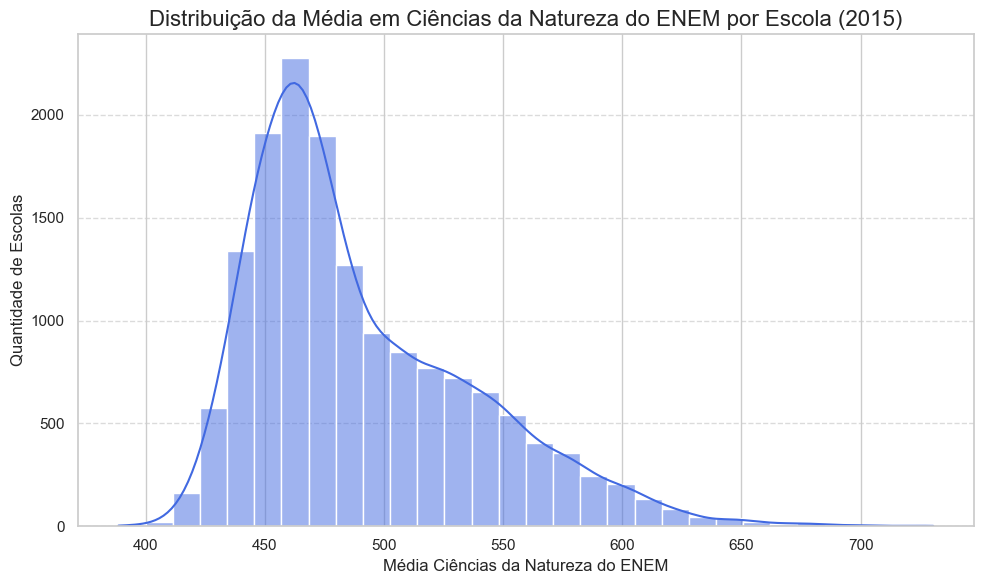

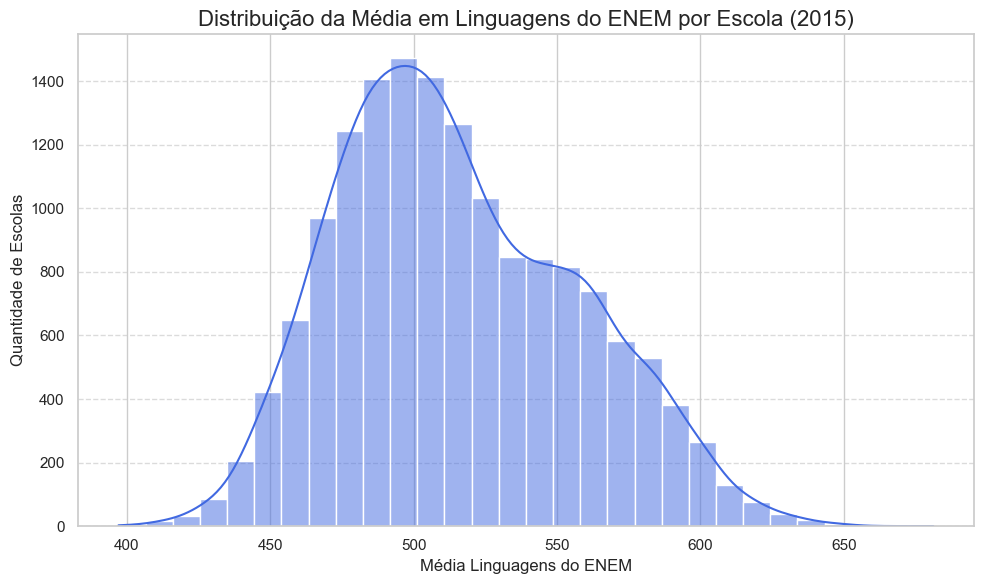

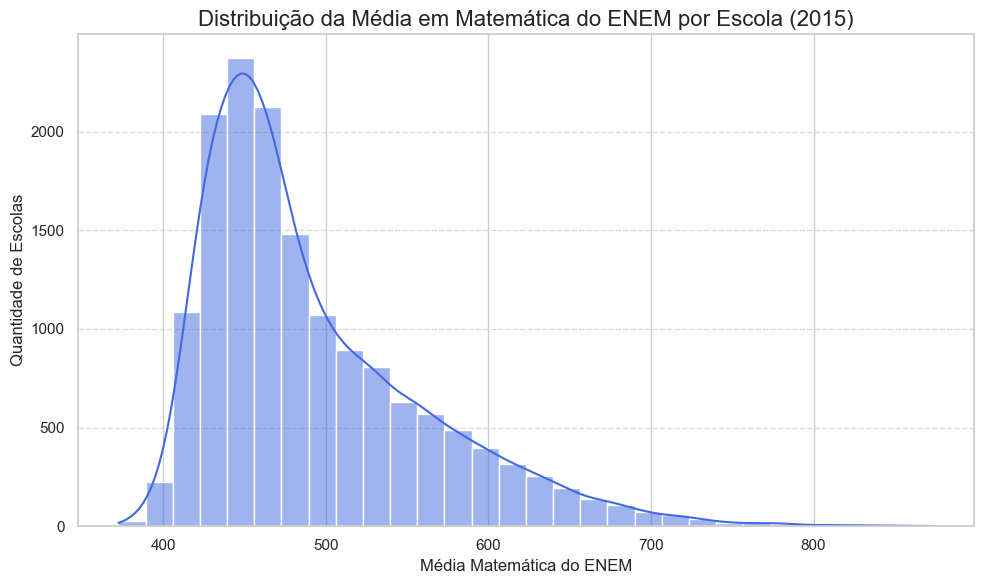

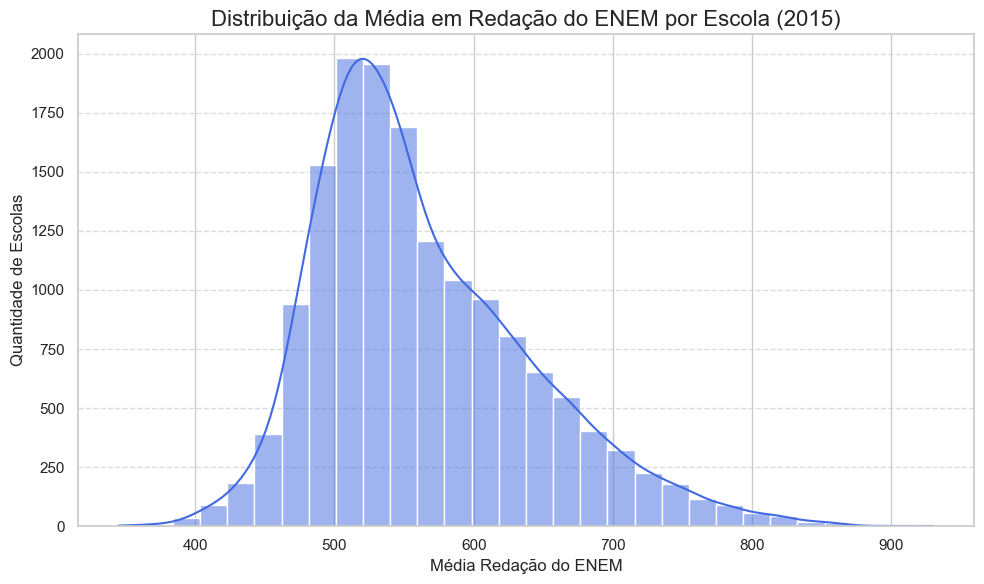

In [149]:
medias = [
    ('NU_MEDIA_TOT', 'Distribuição da Média Total do ENEM por Escola (2015)', 'Média Total do ENEM'),
    ('NU_MEDIA_CH', 'Distribuição da Média em Ciências Humanas do ENEM por Escola (2015)', 'Média Ciências Humanas do ENEM'),
    ('NU_MEDIA_CN', 'Distribuição da Média em Ciências da Natureza do ENEM por Escola (2015)', 'Média Ciências da Natureza do ENEM'),
    ('NU_MEDIA_LP', 'Distribuição da Média em Linguagens do ENEM por Escola (2015)', 'Média Linguagens do ENEM'),
    ('NU_MEDIA_MT', 'Distribuição da Média em Matemática do ENEM por Escola (2015)', 'Média Matemática do ENEM'),
    ('NU_MEDIA_RED', 'Distribuição da Média em Redação do ENEM por Escola (2015)', 'Média Redação do ENEM')
]

for coluna, titulo, xlabel in medias:
    plt.figure(figsize=(10,6))
    sns.histplot(df[coluna], bins=30, color='royalblue', kde=True)
    plt.title(titulo, fontsize=16)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Quantidade de Escolas', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

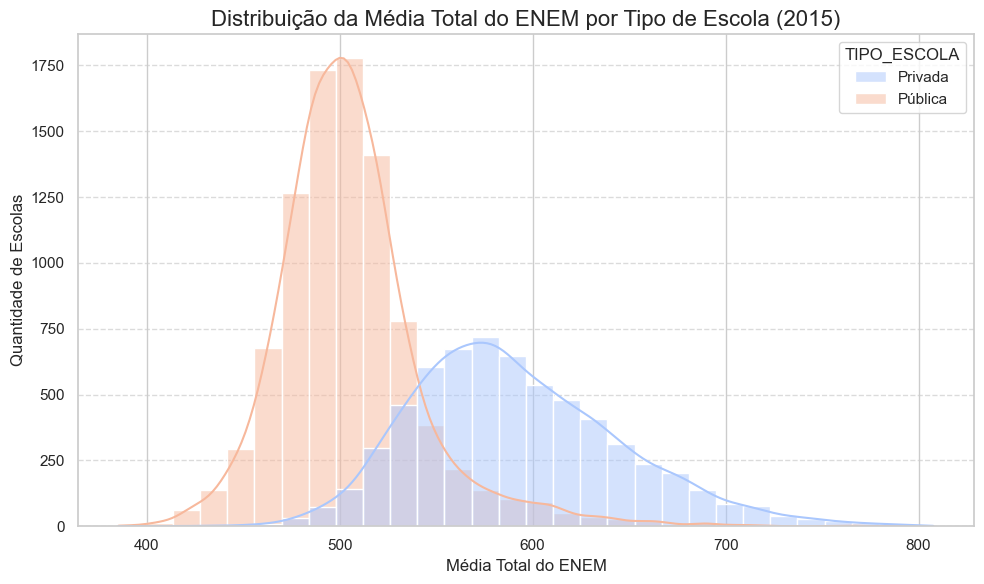

In [150]:
# Cria uma nova coluna agrupando as escolas públicas
df['TIPO_ESCOLA'] = df['TP_DEPENDENCIA'].map(lambda x: 'Pública' if x in [1, 2, 3] else 'Privada')

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='NU_MEDIA_TOT',
    hue='TIPO_ESCOLA',
    bins=30,
    kde=True,
    palette='coolwarm',
    alpha=0.5
)
plt.title('Distribuição da Média Total do ENEM por Tipo de Escola (2015)', fontsize=16)
plt.xlabel('Média Total do ENEM', fontsize=12)
plt.ylabel('Quantidade de Escolas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

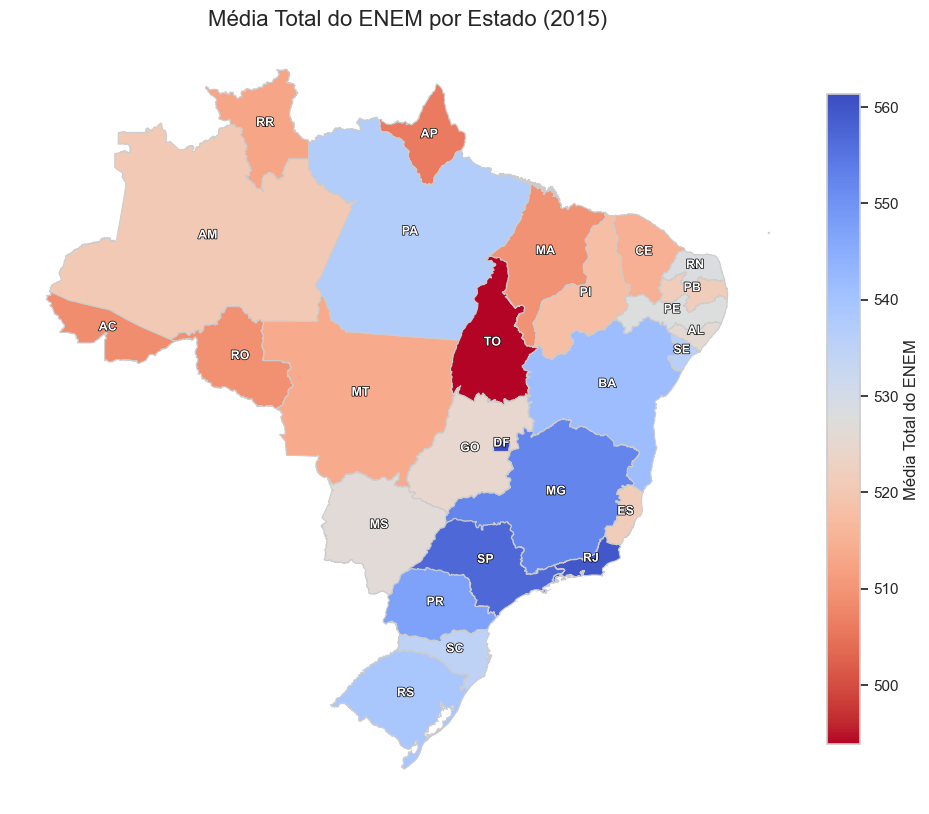

In [153]:
# Carrega o shapefile dos estados do Brasil
br_states = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

# Calcula a média por UF
media_uf = df.groupby('SG_UF')['NU_MEDIA_TOT'].mean().reset_index()
br_states = br_states.rename(columns={'sigla': 'SG_UF'})
mapa = br_states.merge(media_uf, on='SG_UF')

min_media = mapa['NU_MEDIA_TOT'].min()
max_media = mapa['NU_MEDIA_TOT'].max()

vmin, vmax = min_media, max_media 
cmap = 'coolwarm_r' 

fig, ax = plt.subplots(figsize=(14,10))
mapa.plot(column='NU_MEDIA_TOT', cmap=cmap, linewidth=0.8, edgecolor='0.8', ax=ax,
          vmin=vmin, vmax=vmax)

for idx, row in mapa.iterrows():
    plt.annotate(
        row['SG_UF'],
        xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
        horizontalalignment='center',
        fontsize=9,
        fontweight='bold',
        color='white',
        path_effects=[patheffects.withStroke(linewidth=1, foreground="black")]
    )
plt.title('Média Total do ENEM por Estado (2015)', fontsize=16)
plt.axis('off')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label('Média Total do ENEM', fontsize=12)

plt.show()

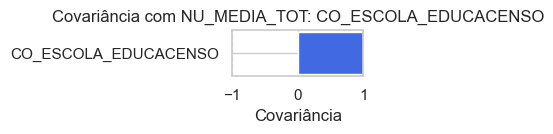

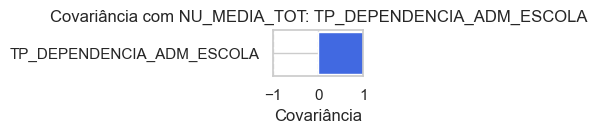

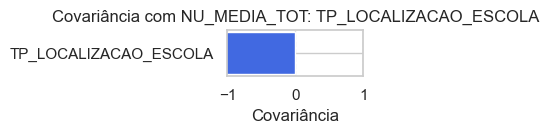

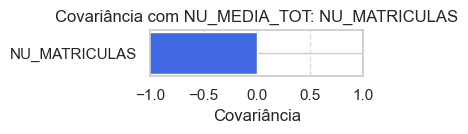

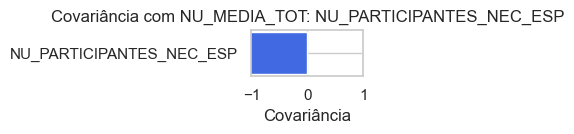

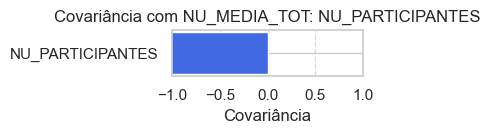

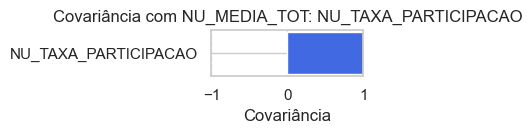

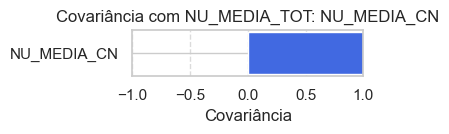

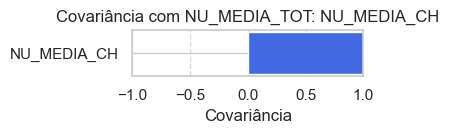

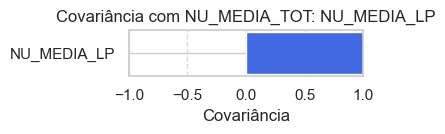

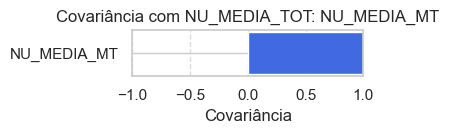

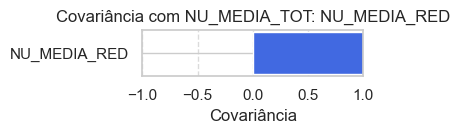

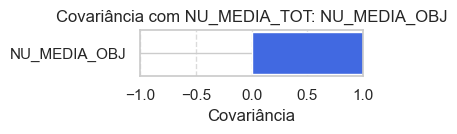

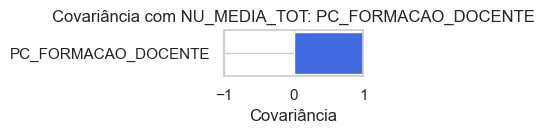

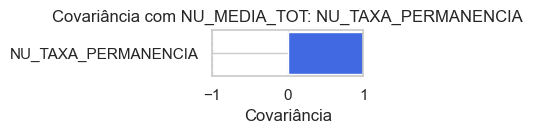

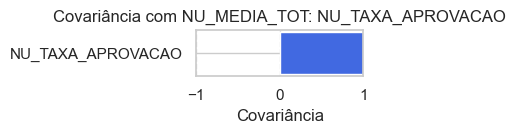

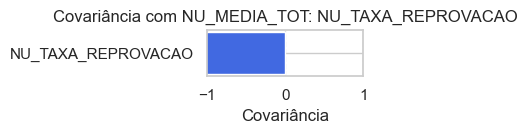

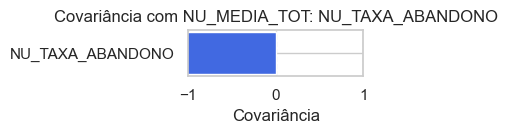

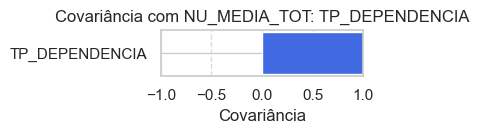

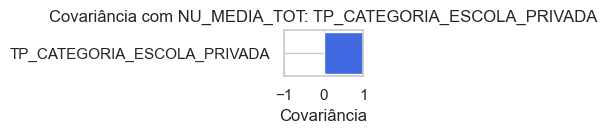

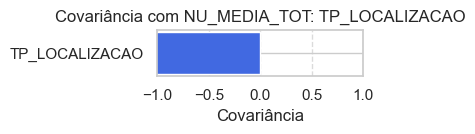

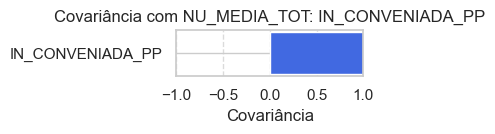

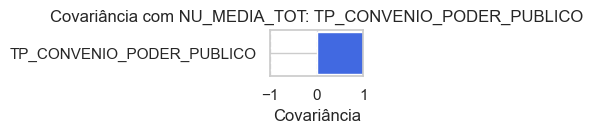

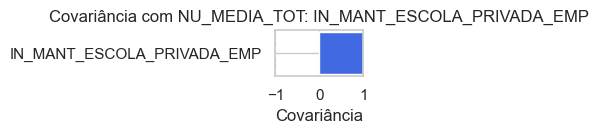

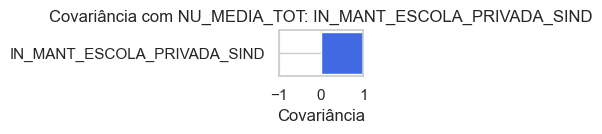

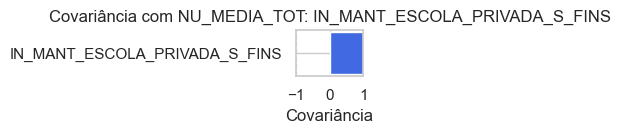

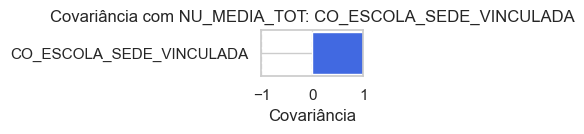

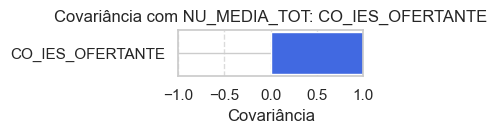

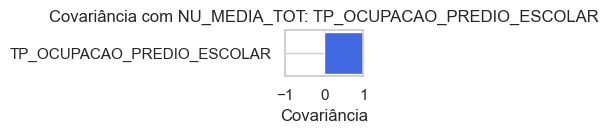

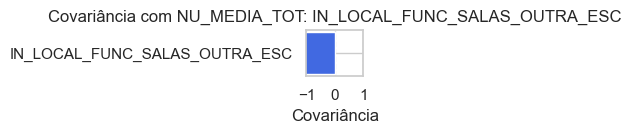

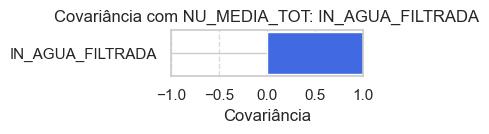

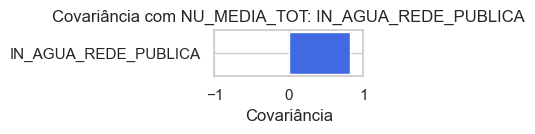

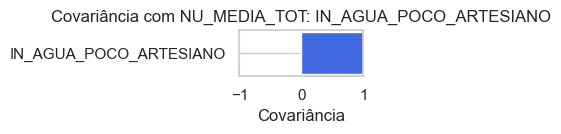

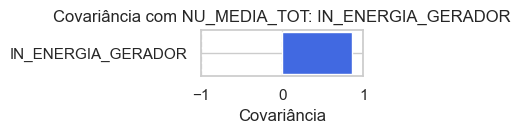

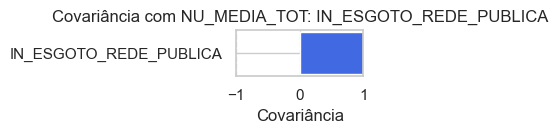

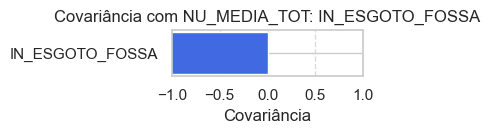

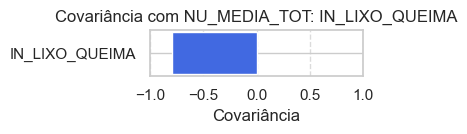

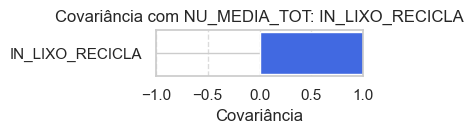

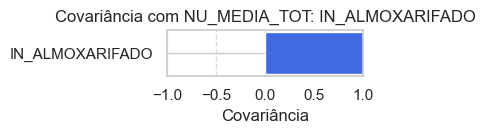

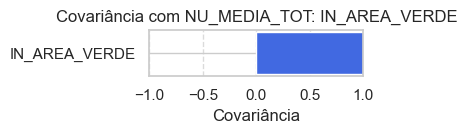

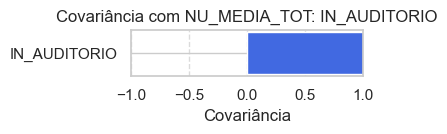

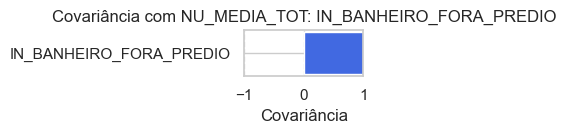

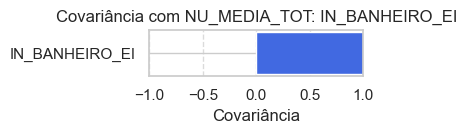

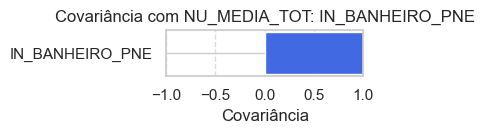

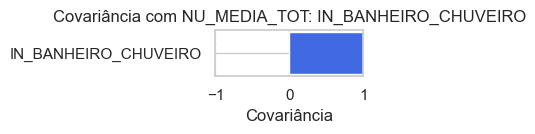

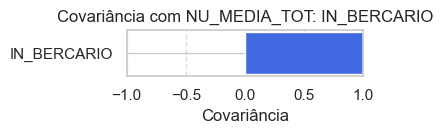

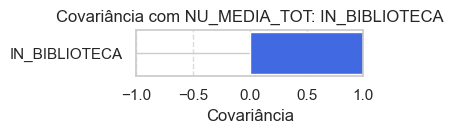

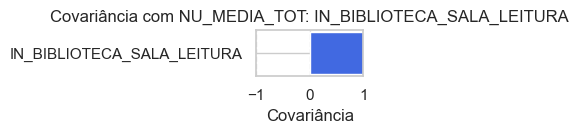

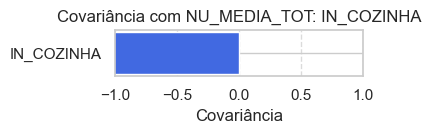

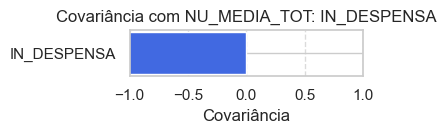

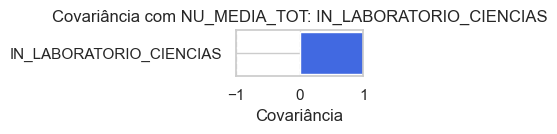

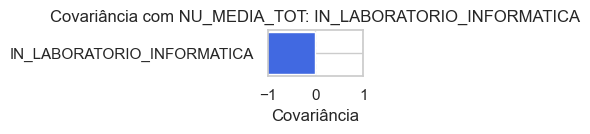

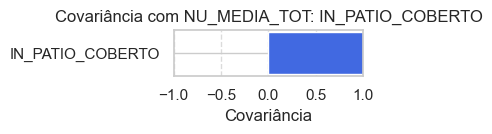

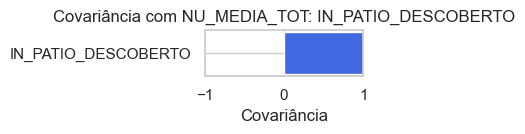

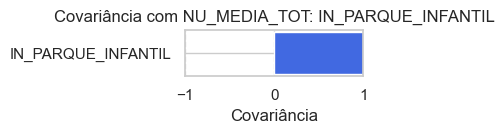

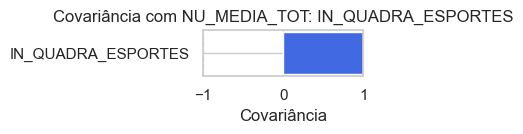

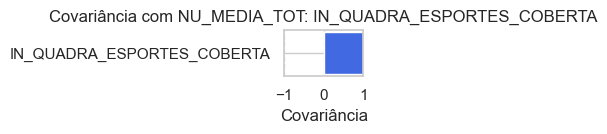

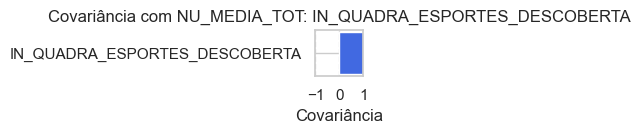

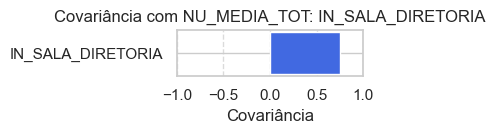

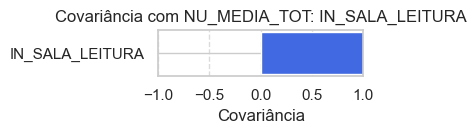

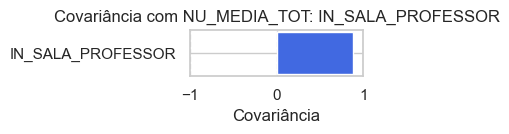

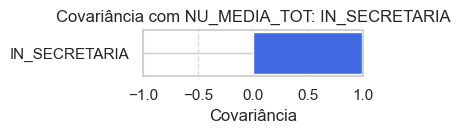

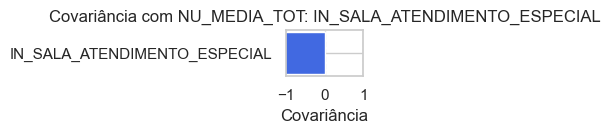

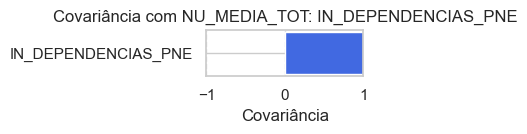

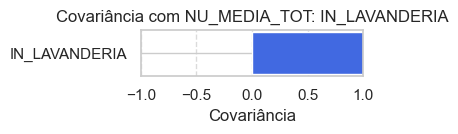

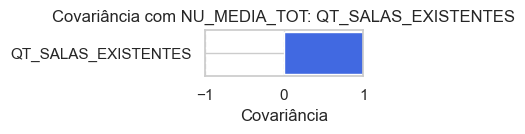

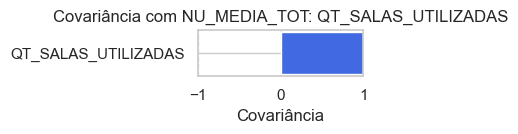

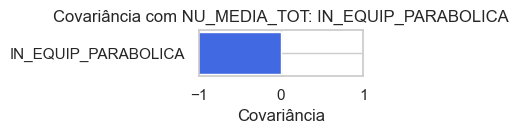

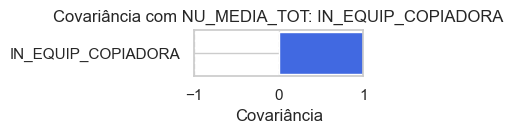

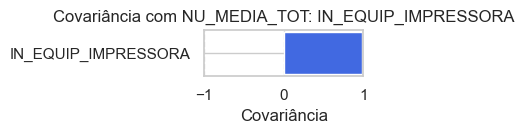

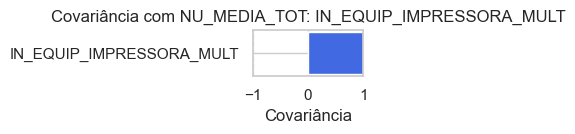

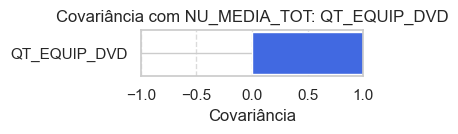

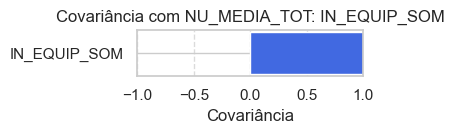

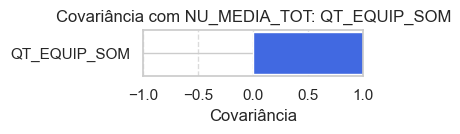

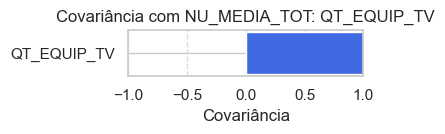

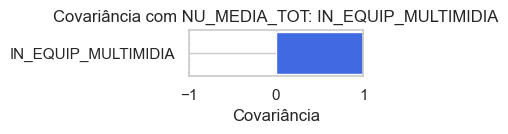

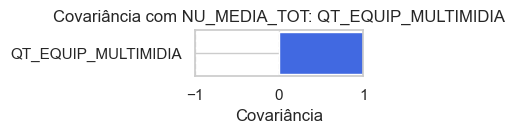

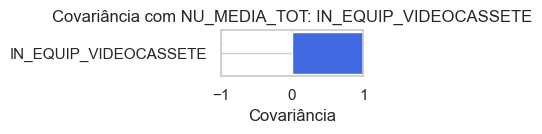

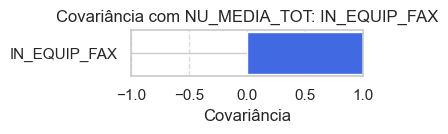

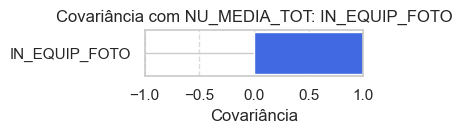

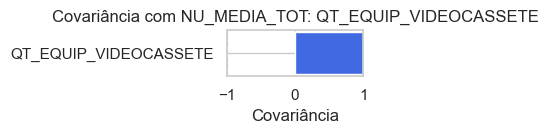

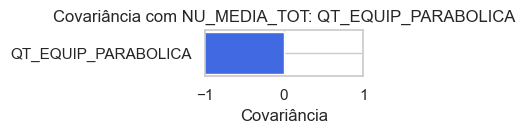

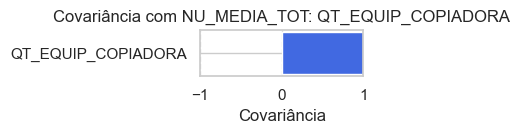

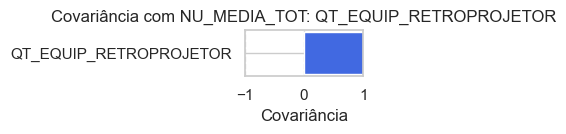

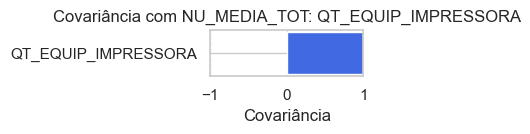

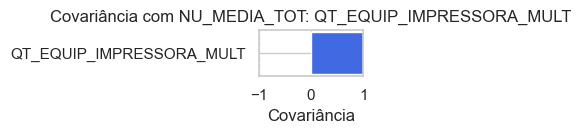

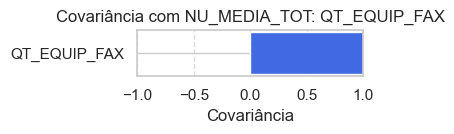

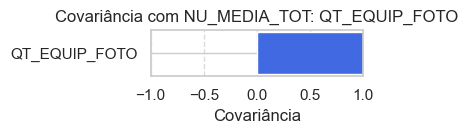

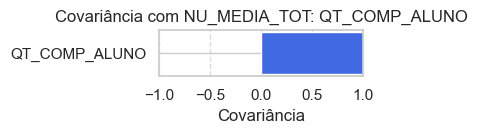

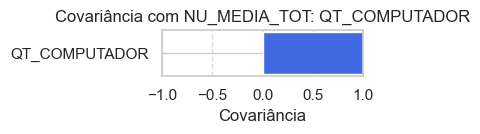

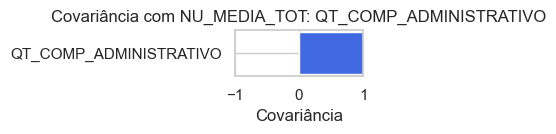

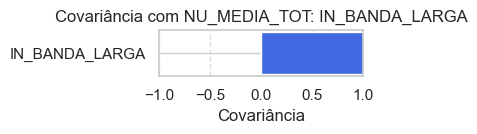

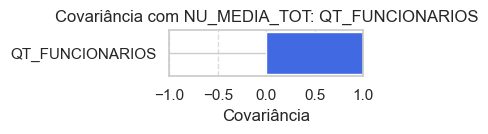

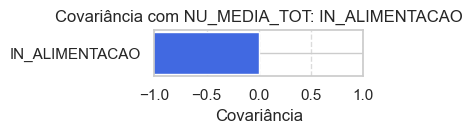

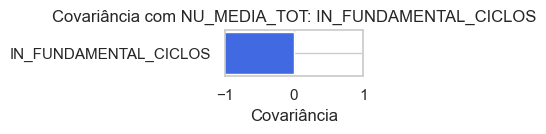

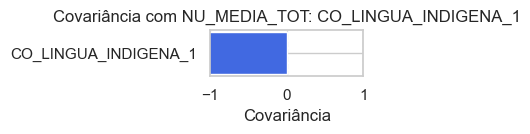

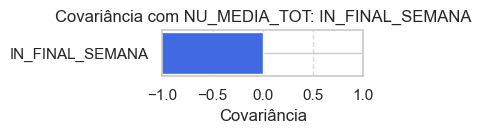

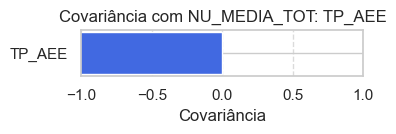

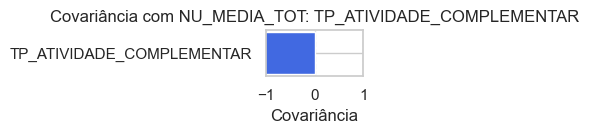

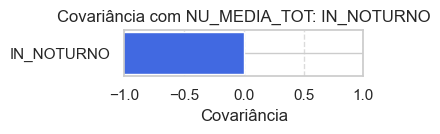

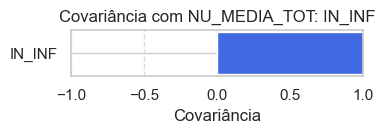

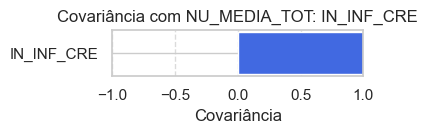

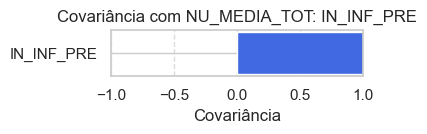

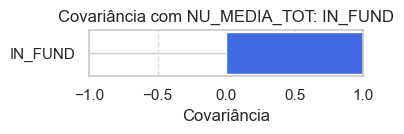

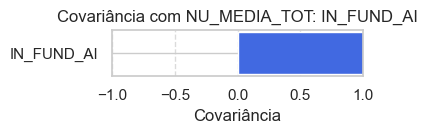

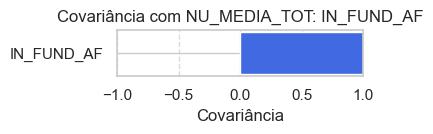

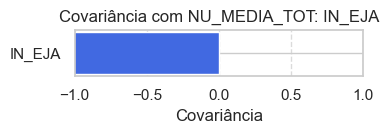

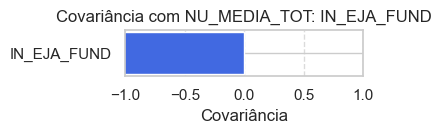

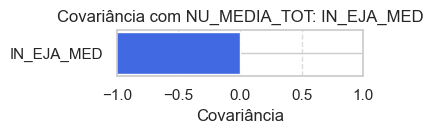

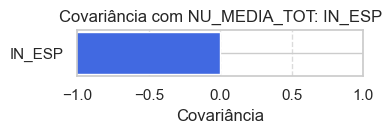

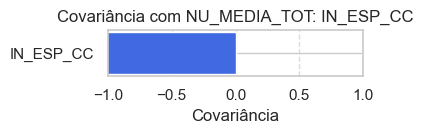

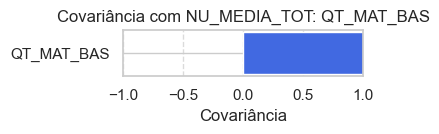

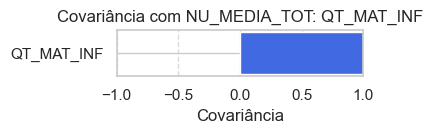

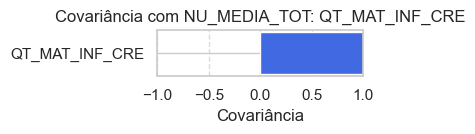

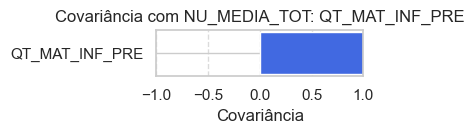

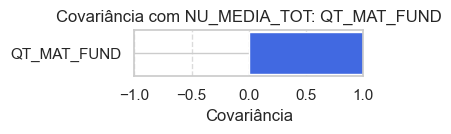

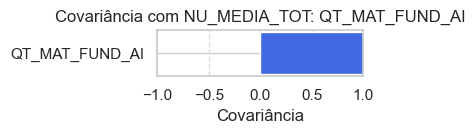

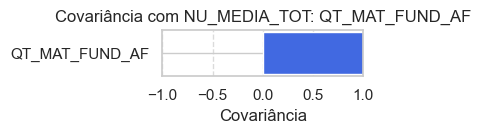

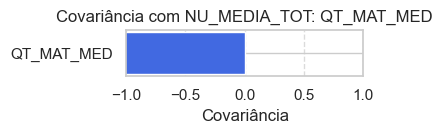

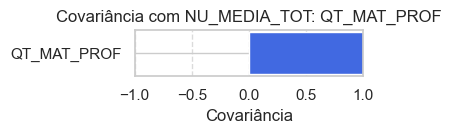

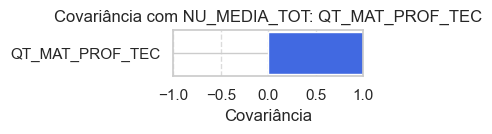

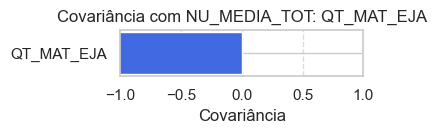

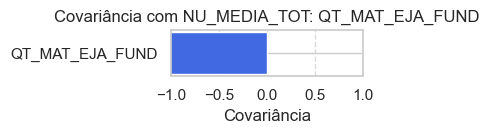

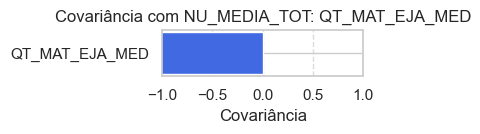

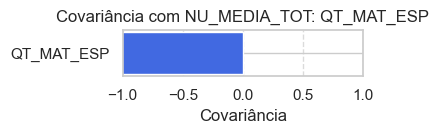

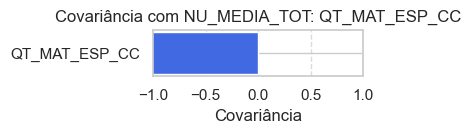

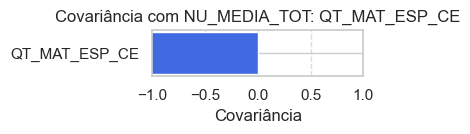

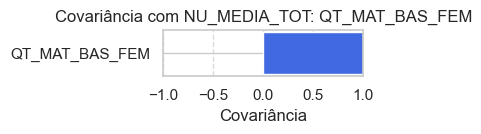

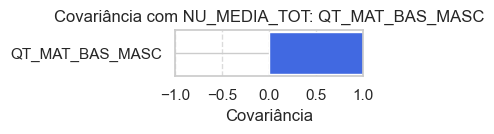

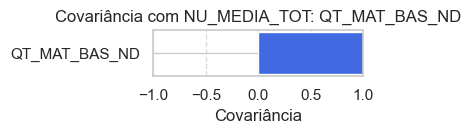

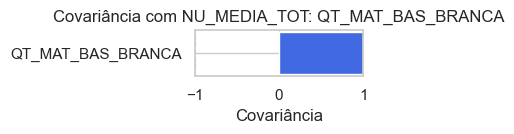

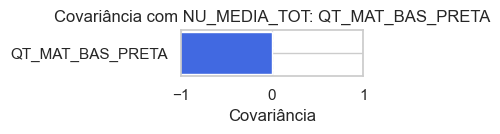

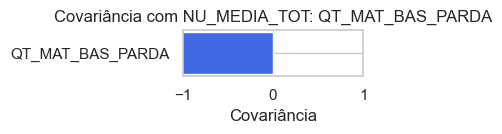

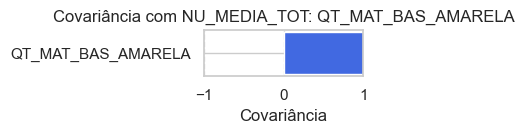

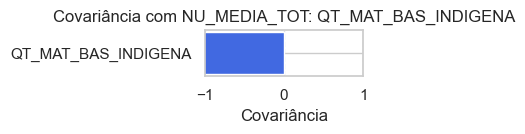

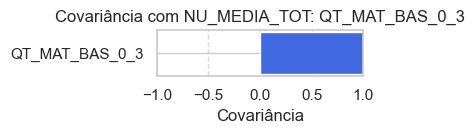

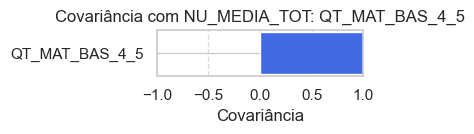

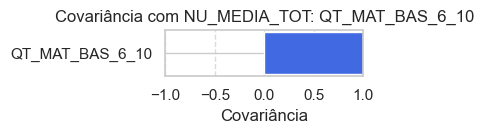

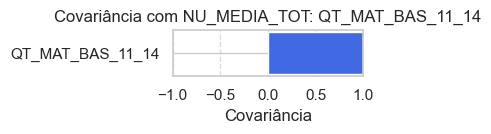

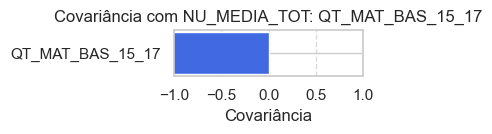

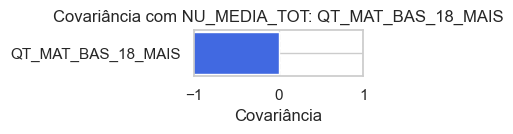

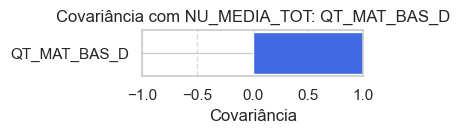

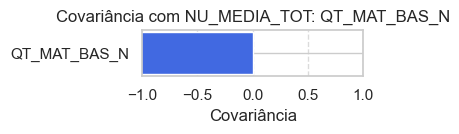

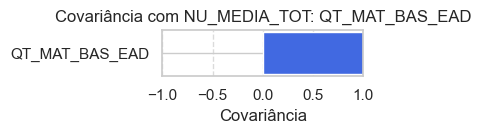

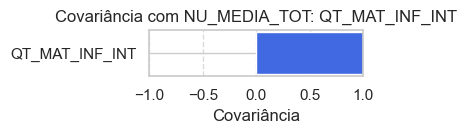

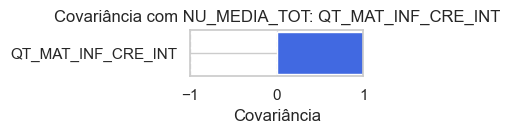

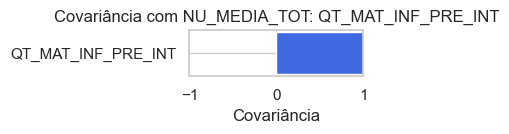

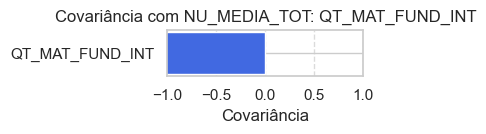

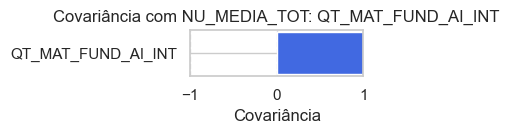

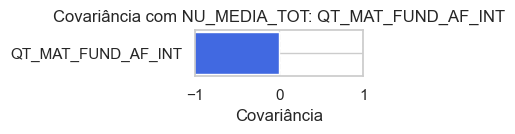

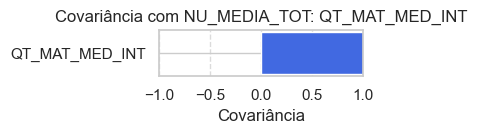

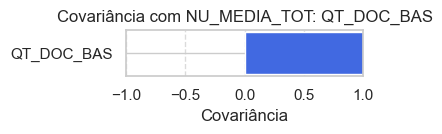

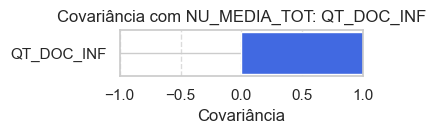

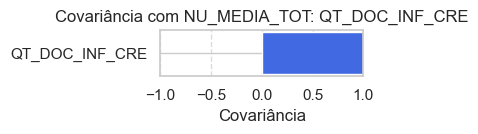

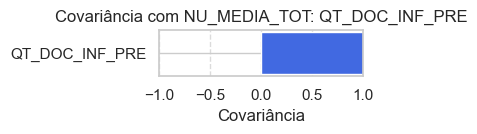

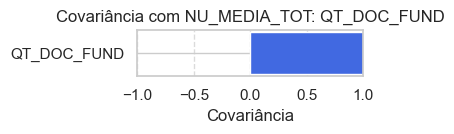

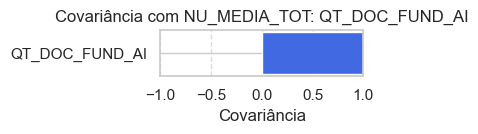

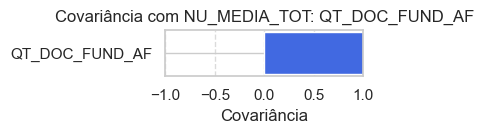

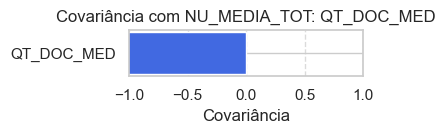

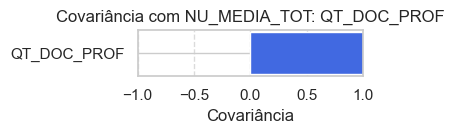

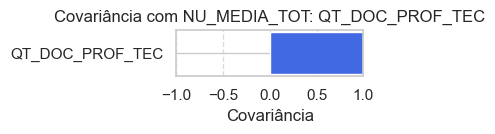

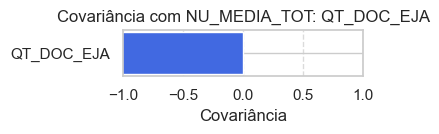

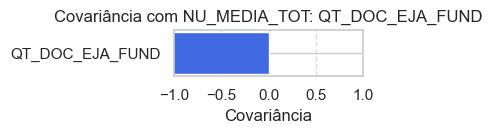

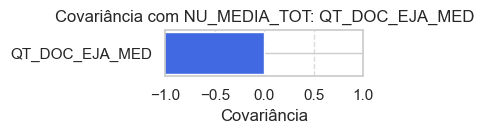

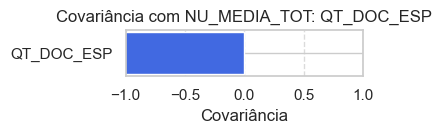

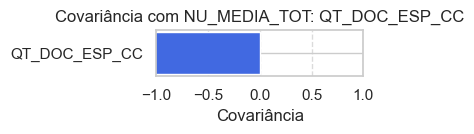

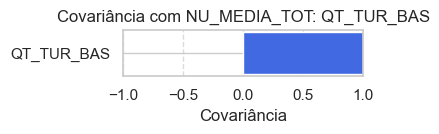

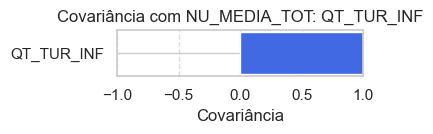

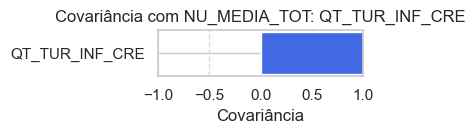

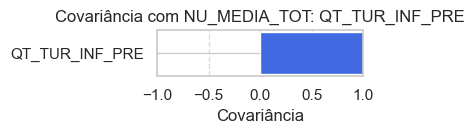

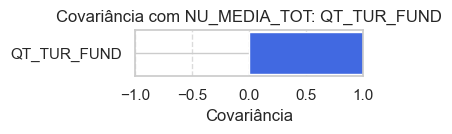

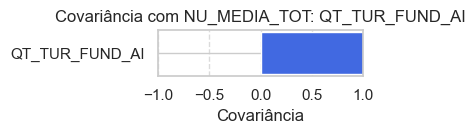

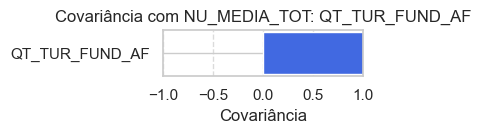

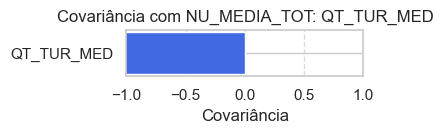

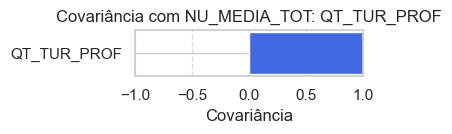

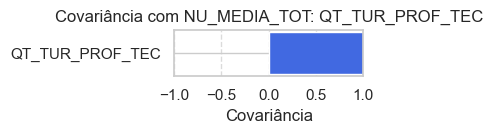

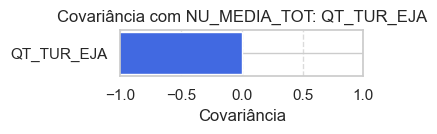

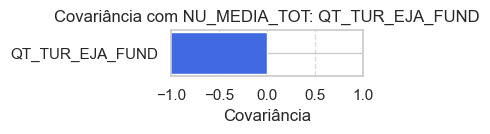

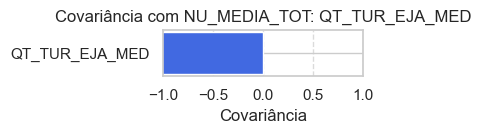

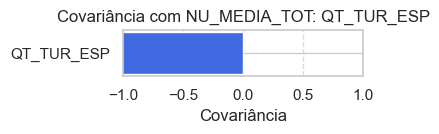

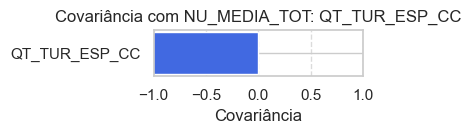

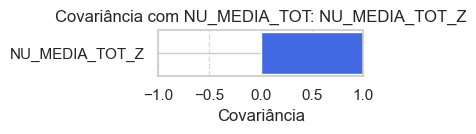

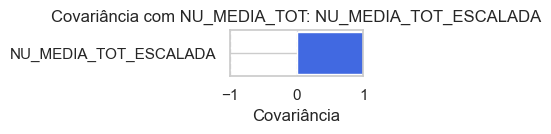

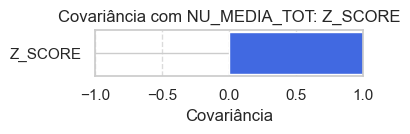

In [161]:
import numpy as np

# Calcula a matriz de covariância apenas para colunas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns
cov_matrix = df[num_cols].cov()

# Para cada coluna, plota a covariância com a média total se |cov| > 0.7
for col in num_cols:
    if col == 'NU_MEDIA_TOT':
        continue
    cov = cov_matrix.loc['NU_MEDIA_TOT', col]
    if abs(cov) > 0.7:
        plt.figure(figsize=(4, 1.5))
        plt.barh([col], [cov], color='royalblue')
        plt.title(f'Covariância com NU_MEDIA_TOT: {col}', fontsize=12)
        plt.xlabel('Covariância')
        plt.xlim(-1, 1)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()